# **Lab 3: Classifying Cars**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


Import the Data

In [ ]:
#dataset = http://l2r.cs.uiuc.edu/~cogcomp/Data/Car/CarData.tar.gz

car_detection = tf.keras.datasets.cifar100.load_data(label_mode="fine")

# (train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.cifar100.load_data()
data = tf.keras.datasets.cifar100.load_data()

train = data[0]
test = data[1]

train_image, train_label = train[0].astype(np.float32), train[1]
test_image, test_label= test[0].astype(np.float32), test[1]

train_label = np.reshape(train_label, newshape=[-1])
test_label = np.reshape(test_label, newshape=[-1])



In [ ]:
class_names = ['airplane','automobile','bird','truck','cat','deer','dog','frog','horse','ship','truck']

Explore the Data

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
len(train_labels)

50000

In [ ]:
train_labels

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
len(test_labels)

10000

Preprocess the Data

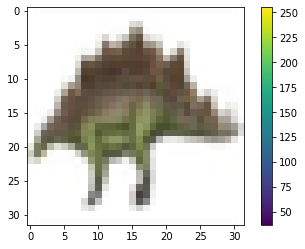

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# test_labels = train_labels / 255.0

Building the Model

In [ ]:
model = keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='softmax'),
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               393344    
Total params: 393,344
Trainable params: 393,344
Non-trainable params: 0
_________________________________________________________________


Compiling Model

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the Model

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 4.8553 - accuracy: 0.0100
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 4.8553 - accuracy: 0.0100
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 4.8553 - accuracy: 0.0100
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 4.8553 - accuracy: 0.0100
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 4.8553 - accuracy: 0.0100


How Accurate is it?

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

ValueError: ignored

# Making Predictions

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[5]

array([0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.01000717,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.01001735, 0.00768726,
       0.00995549, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768726,
       0.00768726, 0.00768726, 0.00768726, 0.00768726, 0.00768

In [ ]:
np.argmax(predictions[0])

39

In [ ]:
test_labels[0]

array([0.0745098])

In [ ]:

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Using the Trained Model


In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(32, 32, 3)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.00768704 0.00768704 0.00768704 0.00768704 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.00768704 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.00768704 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.00768704 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.00768704 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.00768704 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.01001546 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.00768704 0.00768704 0.00768704
  0.01001592 0.00768704 0.00995285 0.00768704 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.00768704 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.00768704 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.00768704 0.00768704 0.00768704
  0.00768704 0.00768704 0.00768704 0.00768704 0.00991284 0.00768704
  0.00768704 0.00768704 0.00768704 0.01003722 0.00768704 0.00768704
  0.00768704 0.0098894  0.00768704 0.00768704 0.

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

94